In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read in data as a pandas dataframe
import pandas as pd
df = pd.read_csv("combined_listings2.csv")
t = df[['id','name','description','neighborhood_overview','host_location','host_total_listings_count','host_identity_verified','neighbourhood_cleansed','latitude','longitude','property_type','room_type','accommodates','bathrooms_text','bedrooms','beds','amenities','price','minimum_nights','maximum_nights','availability_30','availability_60','availability_90'
,'availability_365','number_of_reviews','number_of_reviews_ltm','number_of_reviews_l30d','first_review','last_review','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location'
,'review_scores_value','instant_bookable','calculated_host_listings_count','calculated_host_listings_count_entire_homes','calculated_host_listings_count_private_rooms','calculated_host_listings_count_shared_rooms','reviews_per_month','location']].copy()
df = t
df.dtypes



id                                                int64
name                                             object
description                                      object
neighborhood_overview                            object
host_location                                    object
host_total_listings_count                       float64
host_identity_verified                           object
neighbourhood_cleansed                           object
latitude                                        float64
longitude                                       float64
property_type                                    object
room_type                                        object
accommodates                                      int64
bathrooms_text                                   object
bedrooms                                        float64
beds                                            float64
amenities                                        object
price                                           

In [3]:
# Handle missing data
# Find which attributes have any missing data
df.isna().any()

id                                              False
name                                             True
description                                      True
neighborhood_overview                            True
host_location                                    True
host_total_listings_count                        True
host_identity_verified                           True
neighbourhood_cleansed                          False
latitude                                        False
longitude                                       False
property_type                                   False
room_type                                       False
accommodates                                    False
bathrooms_text                                   True
bedrooms                                         True
beds                                             True
amenities                                       False
price                                           False
minimum_nights              

In [4]:
# Show Amount of rows the data now has
df.shape

(51811, 43)

In [5]:
# Drop any duplicates in the data - if any exist
df = df.drop_duplicates()

# Show starting number of rows the dataset contains
df.shape

(51811, 43)

In [6]:
# Remove missing/incomplete data based on attributes where they should be removed.
# To ensure proper data cleaning the attributes: bathrooms_text, bedrooms, beds, 
# review_scores_rating, review_scores_accuracy, review_scores_cleanliness, first_review, last_review
# review_scores_checkin, review_scores_communication, review_scores_location, review_scores_value, and reviews_per_month.
# will have the any entries with NaN for these attributes removed.
# Without the values of the attribute the data is not usable for the algorithm and can negatively affect the results.
df = df.dropna(subset=['bathrooms_text','bedrooms','beds',
                       'review_scores_rating','review_scores_accuracy','review_scores_cleanliness',
                       'review_scores_checkin','review_scores_communication','review_scores_location',
                       'review_scores_value','reviews_per_month','first_review','last_review'])


# Format price to remove the dollar sign and commas
df['price'] = df['price'].str.replace(',','')
df['price'] = df['price'].str.replace('$','',regex=False)
df['price'] = df['price'].str.replace(' ', '')

df.shape
# As shown by the output some missing/incomplete data was removed 
# to prevent these from negatively affecting the algorithm's results

(34914, 43)

In [7]:
# Check all the variables being cleaned to see if there are no empty attributes data entries
# these are different from NaN as the cell is completely empty -> If true these will be removed
print("Bathrooms:", df['bathrooms_text'].empty)
print("Bedrooms:", df['bedrooms'].empty)
print("Beds:", df['beds'].empty)
print("Rating:", df['review_scores_rating'].empty)
print("Accuracy:", df['review_scores_accuracy'].empty)
print("Cleanliness:", df['review_scores_cleanliness'].empty)
print("Checkin:", df['review_scores_checkin'].empty)
print("Communication:", df['review_scores_communication'].empty)
print("Location:", df['review_scores_location'].empty)
print("Value:", df['review_scores_value'].empty)
print("Reviews per month:", df['reviews_per_month'].empty)
print("First Reviews:", df['first_review'].empty)
print("Last Reviews:", df['last_review'].empty)

Bathrooms: False
Bedrooms: False
Beds: False
Rating: False
Accuracy: False
Cleanliness: False
Checkin: False
Communication: False
Location: False
Value: False
Reviews per month: False
First Reviews: False
Last Reviews: False


# FP-Tree

In [257]:
mel = df[df['location'] == 'melbourne']
syd = df[df['location'] == 'sydney']

mel = mel['amenities']
syd = syd['amenities']

###
np.array(pd.read_json(mel[4]))
np.array(pd.read_json(mel[4])[0].tolist())

###
def json_to_list(x):
    if x == '[]':
        return []
    return pd.read_json(x)[0].tolist()
#     print(transaction, "\n")

mel = mel.apply(json_to_list)
mel = mel.reset_index()['amenities']

syd = syd.apply(json_to_list)
syd = syd.reset_index()['amenities']

###
mel = mel.tolist()
syd = syd.tolist()

# get total
total = df['amenities']
total = total.reset_index()['amenities']
total = total.apply(json_to_list)

In [9]:
# np.array(pd.read_json(mel[4]))
# np.array(pd.read_json(mel[4])[0].tolist())

In [10]:
# mel.apply(lambda x: pd.read_json(x)[0].tolist())

# def json_to_list(x):
#     if x == '[]':
#         return []
#     return pd.read_json(x)[0].tolist()
# #     print(transaction, "\n")

# mel = mel.apply(json_to_list)
# mel = mel.reset_index()['amenities']

In [11]:
# type(mel)

In [12]:
# mel = mel.tolist()

In [258]:
# count each items and select only top ones
amenities_counts = {}

for i in total:
    for j in i:
        if j not in amenities_counts:
            amenities_counts[j] = 1
        else:
            amenities_counts[j] += 1

amenities_counts = {k: v for k, v in sorted(amenities_counts.items(), key=lambda item: item[1], reverse=True)}

amenities_counts

top_k_items = {k: amenities_counts[k] for k in list(amenities_counts)[50:90]}
top_k_items = list(top_k_items.keys())
# top_k_items.remove('Carbon monoxide alarm')
# top_k_items.remove('Wifi')
top_k_items

['Room-darkening shades',
 'Children’s books and toys',
 'Indoor fireplace',
 'Pack ’n Play/travel crib',
 'Ethernet connection',
 'Crib',
 'Private living room',
 'Cleaning before checkout',
 'Children’s dinnerware',
 'Paid parking on premises',
 'Beach essentials',
 'Beachfront',
 'Keypad',
 'Barbecue utensils',
 'Waterfront',
 'Baking sheet',
 'Baby bath',
 'Babysitter recommendations',
 'Building staff',
 'Game console',
 'Pocket wifi',
 'Window guards',
 'Bedroom comforts',
 'Bathroom essentials',
 'Smart lock',
 'Changing table',
 'Stair gates',
 'Lake access',
 'Full kitchen',
 'Bread maker',
 'Outlet covers',
 'Self check-in',
 'Fireplace guards',
 'Baby monitor',
 'Table corner guards',
 'EV charger',
 'Pets allowed',
 'Smoking allowed',
 'Piano',
 'Shared hot tub']

In [240]:
# # count each items and select only top ones
# amenities_counts = {}

# for i in syd:
#     for j in i:
#         if j not in amenities_counts:
#             amenities_counts[j] = 1
#         else:
#             amenities_counts[j] += 1

# amenities_counts = {k: v for k, v in sorted(amenities_counts.items(), key=lambda item: item[1], reverse=True)}

# amenities_counts

# top_k_items = {k: amenities_counts[k] for k in list(amenities_counts)[0:14]}
# top_k_items = list(top_k_items.keys())
# top_k_items.remove('Essentials')
# # top_k_items.remove('Wifi')
# top_k_items_syd

In [259]:
for i in range(len(mel)):
    mel[i] = [x for x in mel[i] if x in top_k_items]

for i in range(len(syd)):
    syd[i] = [x for x in syd[i] if x in top_k_items] 
    
for i in range(len(total)):
    total[i] = [x for x in total[i] if x in top_k_items]    

In [260]:
mel = [x for x in mel if x != []]
syd = [x for x in syd if x != []]
total = [x for x in total if x != []]


# Testing FP Growth

# Implementation

In [16]:
import pprint
import time
import pyfpgrowth
import itertools
import pandas as pd

test_set = [['I1','I2','I5'],
     ['I2','I4'],
     ['I2','I3'],
     ['I1','I2','I4'],
     ['I1','I3'],
     ['I2','I3'],
     ['I1','I3'],
     ['I1','I2','I3','I5'],
     ['I1','I2','I3']
    ]

patterns0 = pyfpgrowth.find_frequent_patterns(test_set, 2)
rules0 = pyfpgrowth.generate_association_rules(patterns0, 0)


In [269]:
class Node(object):
    
    def __init__(self, name, count, parent):
        self.name = name
        self.count = count
        self.parent = parent
        self.next = None
        self.children = np.array([])
        
    def add_child(self, name):
        child = Node(name, 1, self)
        self.children = np.append(self.children, child)
        return child
    
    def has_child(self, name):
        for node in self.children:
            if node.name == name:
                return True
        return False
    
    def get_child(self, name):
        for node in self.children:
            if node.name == name:
                return node
        return None

    
    
class Tree(object):

    def __init__(self, transactions, threshold, root_name, root_count):
        
        self.frequents = build_frequents_table(transactions, threshold)        
        self.headers = build_headers_table(self.frequents)
        self.root = self.build_tree(transactions, root_name, root_count, self.headers, self.frequents)
        
        
    def build_tree(self, transactions, root_name, root_count, headers, frequents):
        root = Node(root_name, root_count, None)
        for transaction in transactions:
            sorted_transaction = [x for x in transaction if x in frequents]
            sorted_transaction = sorted(sorted_transaction, key=lambda x: frequents[x], reverse=True)
            current = root
            for item in sorted_transaction:
                if current.has_child(item):
                    current = current.get_child(item)
                    current.count += 1 
                else:
                    current.add_child(item)
                    current = current.get_child(item)
                    
                    if headers[current.name] is None:
                        headers[current.name] = current
                    else:
                        headers_current = headers[current.name]
                        while headers_current.next is not None:
                            headers_current = headers_current.next
                        headers_current.next = current                    
        return root

    
    
    def generate_patterns(self, threshold):
        patterns = {}
        mining_order = sorted(self.frequents.keys(), key=lambda x: self.frequents[x])
        
        for item in mining_order:
#             print('item: ', item)
            occurences = np.array([])
            cond_tree_input = []
            current = self.headers[item]

            while current is not None:
                occurences = np.append(occurences, current)
                current = current.next

            for occurence in occurences:
                frequency = occurence.count
                path = []
                parent = occurence.parent
                
                while parent.parent is not None:
                    path.append(parent.name)
                    parent = parent.parent
                for i in range(frequency):
                    cond_tree_input.append(path)
                    
            cond_tree = Tree(cond_tree_input, threshold, item, self.frequents[item])
            sub_pattern = mine_cond_tree(cond_tree, threshold, cond_tree_input)
                    
            patterns = {**patterns, **sub_pattern}

        for item in list(patterns.keys()):
            if patterns[item] < threshold:
                del patterns[item]
        
        return dict(sorted(patterns.items(), key=lambda x: x[1])), self.frequents


    
def build_frequents_table(transactions, threshold): 
    frequents = {}
    for transaction in transactions:
        for item in transaction:
            if item not in frequents:
                frequents[item] = 1
            else:
                frequents[item] += 1
    for item in list(frequents.keys()):
        if frequents[item] < threshold:
            del frequents[item]
    return frequents



def build_headers_table(frequents):
    headers = {}
    for key in frequents:
        headers[key] = None
    
    return headers
    
    
def collect_paths(tree, paths, subpath):
    path_collection = []
    pruned_path_collection = []
    visited_nodes = []
    for path in paths:
        if(all(x in list(path) for x in subpath)):
            index2 = path.index(subpath[-1]) + 1 
            pruned_path = list(path)[:index2]
            path_collection.append(list(pruned_path))        
    
    for path in path_collection:
        current = tree.root
        for item in path:
            current = current.get_child(item)
        if current not in visited_nodes:
            pruned_path_collection.append(path)
            visited_nodes.append(current)
        
    return pruned_path_collection



def trace_back(tree, patterns, last_node):
    current = tree.root
    count = 0
    for pattern in patterns:
        current = tree.root
        for item in pattern:
            current = current.get_child(item)
            if(current.name == last_node):
                break
        count += current.count
    return count



def mine_cond_tree(tree, threshold, paths):
    current_item = tree.root.name
    paths_dict = {}
    paths_dict_new = {}
    patterns = {}
    item_above_threshold = list(tree.frequents.keys())
    
    for item in paths:
        item1 = [x for x in item if x in tree.frequents]
        item1 = sorted(item1, key=tree.frequents.get, reverse=True)
        paths_dict[tuple(item1)] = paths.count(item)    

    # create new path dict
    for path, value in paths_dict.items():
        temp_path = tuple([x for x in list(path) if x in item_above_threshold])
        if temp_path not in paths_dict_new.keys():
            paths_dict_new[temp_path] = value
        else:
            paths_dict_new[temp_path]+=1  
    
    for path, count in paths_dict_new.items():
        if len(list(path)) == 1:
            patterns[tuple(sorted(list(path)+[current_item]))] = tree.frequents[list(path)[0]]
            item_above_threshold.remove(list(path)[0])
        elif len(list(path)) > 1:
            temp_dict = tree.frequents
            paths_collection = collect_paths(tree, list(paths_dict_new.keys()), list(path))
            total_count = trace_back(tree, paths_collection, path[-1])
            patterns[tuple(sorted(list(path)+[current_item]))] = total_count
            
    # Get 2-nodes path
    for item in item_above_threshold:
        patterns[tuple(sorted([item, current_item]))] = tree.frequents[item]
                
    return patterns



def generate_rules(frequent_table, patterns, conf_threshold):
    rules = {}
    lifts = {}
    frequents_dict = {(k,):v for k,v in frequent_table.items()}
    patterns = {**patterns, **frequents_dict}
#     print(patterns,'\n\n')
    for itemset in patterns.keys():
#         print('\nitemset: ', itemset)
        combined_support = patterns[itemset]
        combinations = []
        
        for i in range(1, len(itemset)):
            for combination in itertools.combinations(itemset, i):
                combinations.append(combination)
        
        for itemsetA in combinations:
            itemsetA = tuple(sorted(itemsetA))
            itemsetB = tuple(sorted(x for x in itemset if x not in itemsetA))
            if itemsetA in patterns and itemsetB in patterns:
                itemsetA_support = patterns[itemsetA]
                itemsetB_support = patterns[itemsetB]
                confidence = float(combined_support) / float(itemsetA_support)
                lift = float(confidence) / float(itemsetB_support)
                if confidence >= conf_threshold:
#                     print(itemsetA, '->', itemsetB)
#                     print('itemsetA_support', itemsetA_support)
#                     print('combined_support', combined_support)
                    if itemsetA in rules:
                        rules[itemsetA].append((itemsetB, confidence))
                        lifts[itemsetA].append((itemsetB, lift))
                    else:
                        rules[itemsetA] = [(itemsetB, confidence)]
                        lifts[itemsetA] = [(itemsetB, lift)]
    #                 print('+++++ > ', itemsetA, ': ', (itemsetB, confidence))

    return rules, lifts
    
    

# start timer
start = time.time()

transactions = test_set
no_transactions = len(transactions)
sup_threshold = 2
conf_threshold = 0.8

# initialise tree
tree = Tree(transactions, sup_threshold, None, None)
print('Association rules: \n')
patterns, frequent_table = tree.generate_patterns(sup_threshold)

# create patterns where sup = sup/N
patterns_new = {k:v/no_transactions for k, v in patterns.items()}
frequent_table = {k:v/no_transactions for k, v in frequent_table.items()}
print('\n')

conf_rules, lift_rules = generate_rules(frequent_table, patterns_new, conf_threshold)
pprint.pprint(lift_rules)

time_taken = time.time() - start
print('Time taken: {}s'.format(time_taken))

Association rules: 



{('Baby bath',): [(('Pack ’n Play/travel crib', 'Room-darkening shades'),
                   4.8076923076923075),
                  (('Children’s books and toys', 'Children’s dinnerware'),
                   3.90625),
                  (('Children’s dinnerware',), 3.676470588235294),
                  (('Room-darkening shades',), 3.125),
                  (('Children’s books and toys',), 1.644736842105263),
                  (('Pack ’n Play/travel crib',), 2.7777777777777777)],
 ('Baby bath', 'Children’s books and toys'): [(('Children’s dinnerware',),
                                               5.88235294117647)],
 ('Baby bath', 'Children’s dinnerware'): [(('Children’s books and toys',),
                                           2.6315789473684212)],
 ('Baby bath', 'Pack ’n Play/travel crib'): [(('Room-darkening shades',),
                                              4.166666666666667)],
 ('Baby bath', 'Room-darkening shades'): [(('Pack ’n Play/travel crib',

In [64]:
# start timer
start = time.time()

patterns = pyfpgrowth.find_frequent_patterns(transactions, sup_threshold)
rules = pyfpgrowth.generate_association_rules(patterns, conf_threshold)
pprint.pprint(rules)

time_taken = time.time() - start
print('\nTime taken: {}s'.format(time_taken))

{('Air conditioning', 'Hair dryer'): (('Laptop-friendly workspace',),
                                      0.8823529411764706),
 ('Air conditioning', 'Laptop-friendly workspace'): (('Hair dryer',),
                                                     0.9836065573770492),
 ('Hair dryer',): (('Hot water',), 0.8372093023255814),
 ('Hair dryer', 'Hot water'): (('Laptop-friendly workspace',),
                               0.8888888888888888),
 ('Hair dryer', 'Laptop-friendly workspace'): (('Hot water',),
                                               0.8767123287671232),
 ('Hair dryer', 'Shampoo'): (('Hot water',), 0.8571428571428571),
 ('Hot water',): (('Hair dryer',), 0.8888888888888888),
 ('Hot water', 'Laptop-friendly workspace'): (('Hair dryer',),
                                              0.927536231884058),
 ('Hot water', 'Shampoo'): (('Hair dryer',), 0.9375),
 ('Laptop-friendly workspace', 'Shampoo'): (('Hair dryer',), 0.96875)}

Time taken: 0.011561155319213867s


# R - Export transaction to CSV

In [65]:
# Make the transaction to be one hot encoder (for R)
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)

df_export = pd.DataFrame(te_ary, columns = sorted(frequent_table.keys()))   
df_export.to_csv('~/Downloads/mel100.csv', index=False)

# Weka - Print neccessary metadata


In [62]:
set_name = 'mel100_w'
file_name = '/Users/lunary/Downloads/{}.arff'.format(set_name)

# print out
print('@relation {}\n'.format(set_name))
for item in top_k_items:
    print("@attribute '{}' {{ t}}".format(item))
print('\n@data\n...')

# for row in df_export.values:
#     row = ['t' if x else '?' for x in row]
#     print(*row, sep=',')
    
    
## write to file
f = open(file_name, "w")
f.write('@relation {}\n\n'.format(set_name))
for item in top_k_items:
    f.write("@attribute '{}' {{ t}}\n".format(item))
f.write('\n@data\n')

for row in df_export.values:
    row = ['t' if x else '?' for x in row]
    row_str = ','.join([str(item) for item in row])
    f.write(row_str)
    f.write('\n')
f.close()
print('\nFinished writing to file')

@relation total

@attribute 'Wifi' { t}
@attribute 'Coffee maker' { t}
@attribute 'Stove' { t}
@attribute 'TV' { t}
@attribute 'Lock on bedroom door' { t}
@attribute 'Dishes and silverware' { t}
@attribute 'Air conditioning' { t}
@attribute 'Hot water' { t}
@attribute 'Kitchen' { t}
@attribute 'Smoke alarm' { t}
@attribute 'Cooking basics' { t}
@attribute 'Oven' { t}
@attribute 'Hair dryer' { t}
@attribute 'Heating' { t}
@attribute 'First aid kit' { t}
@attribute 'Laptop-friendly workspace' { t}
@attribute 'Refrigerator' { t}
@attribute 'Fire extinguisher' { t}
@attribute 'Long term stays allowed' { t}
@attribute 'Private entrance' { t}
@attribute 'Garden or backyard' { t}
@attribute 'Iron' { t}
@attribute 'Essentials' { t}
@attribute 'Washer' { t}
@attribute 'Luggage dropoff allowed' { t}
@attribute 'Microwave' { t}
@attribute 'Carbon monoxide alarm' { t}
@attribute 'Shampoo' { t}
@attribute 'Extra pillows and blankets' { t}
@attribute 'Lockbox' { t}
@attribute 'Dryer' { t}
@attribute

# Comparison between implementation and library

### Time taken of library (pyfpgrowth)

In [79]:
time_taken_lib1 = []
transactions = total

for i in range(1000, len(transactions), 1000):
    print(i)
    # start timer
    start = time.time()
    
    sup_threshold = i*(60/100)
    conf_threshold = 0.8
    patterns = pyfpgrowth.find_frequent_patterns(transactions[:i], sup_threshold)
    rules = pyfpgrowth.generate_association_rules(patterns, conf_threshold)
    
    time_taken = time.time() - start
    print('time taken: ', time_taken)
    time_taken_lib1.append(time_taken)

1000
time taken:  0.02312016487121582
2000
time taken:  0.03226304054260254
3000
time taken:  0.028683185577392578
4000
time taken:  0.04276585578918457
5000
time taken:  0.056089162826538086
6000
time taken:  0.06404495239257812
7000
time taken:  0.08262920379638672
8000
time taken:  0.09451866149902344
9000
time taken:  0.11747217178344727
10000
time taken:  0.13443899154663086
11000
time taken:  0.1736898422241211
12000
time taken:  0.16647815704345703
13000
time taken:  0.18535780906677246
14000
time taken:  0.20611906051635742
15000
time taken:  0.2310199737548828
16000
time taken:  0.25286293029785156
17000
time taken:  0.260361909866333
18000
time taken:  0.23908782005310059
19000
time taken:  0.1865859031677246
20000
time taken:  0.18349885940551758
21000
time taken:  0.16368985176086426
22000
time taken:  0.18909597396850586
23000
time taken:  0.1812732219696045
24000
time taken:  0.18698906898498535
25000
time taken:  0.23768305778503418
26000
time taken:  0.23802995681762695

### Time taken of implementation

In [83]:
time_taken_imp1 = []

for i in range(1000, len(transactions), 1000):
    # start timer
    start = time.time()
    
    sup_threshold = i*(60/100)
    conf_threshold = 0.8
    
    tree = Tree(transactions[:i], sup_threshold, None, None)
    patterns, frequent_table = tree.generate_patterns(sup_threshold)
    
    time_taken = time.time() - start
    print(i, 'time taken: ', time_taken)
    time_taken_imp1.append(time_taken)

1000 time taken:  0.06458878517150879
2000 time taken:  0.11516022682189941
3000 time taken:  0.18175888061523438
4000 time taken:  0.3190033435821533
5000 time taken:  0.5001888275146484
6000 time taken:  0.6785039901733398
7000 time taken:  0.8580272197723389
8000 time taken:  1.0951800346374512
9000 time taken:  1.5700249671936035
10000 time taken:  1.9240198135375977
11000 time taken:  2.09334397315979
12000 time taken:  2.6072020530700684
13000 time taken:  2.7411248683929443
14000 time taken:  2.993891716003418
15000 time taken:  3.5850119590759277
16000 time taken:  4.32365608215332
17000 time taken:  4.521302938461304
18000 time taken:  5.062202215194702
19000 time taken:  5.891650676727295
20000 time taken:  5.95809006690979
21000 time taken:  6.886858940124512
22000 time taken:  7.749295711517334
23000 time taken:  7.9467198848724365
24000 time taken:  8.806652069091797
25000 time taken:  9.281038999557495
26000 time taken:  9.128867149353027
27000 time taken:  10.40717697143

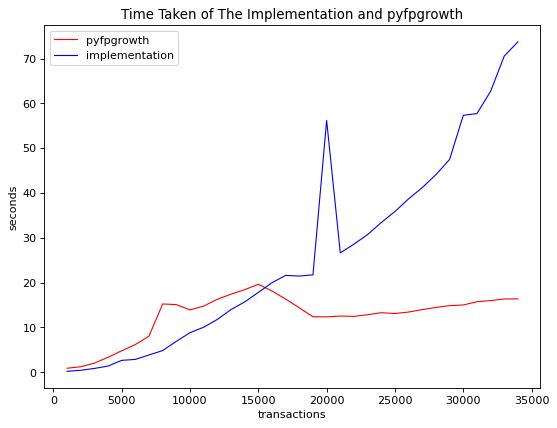

In [114]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)
x = np.arange(1000, 35000, 1000)
y1 = time_taken_lib
y2 = time_taken_imp
# y3 = [1.21, 1.988, 2.412, 3.01, 2.76, 3.123, 3.79, 4.402, 4.655, 4.94, 5.22, 5.65, 6.02, 6.504, 6.187, 8.49, 7.4, 7.48, 8.707, 10.122, 8.643, 9.17, 9.46, 9.913, 10.38, 10.69, 11.32, 11.726, 12.34, 12.56, 13.02, 14.04, 15.56]

plt.plot(x, y1, '-r', linewidth=1, label='pyfpgrowth')
plt.plot(x, y2, '-b', linewidth=1, label='implementation')
# plt.plot(x, y3, '-g', linewidth=1, label='R')
plt.legend()

plt.title('Time Taken of The Implementation and pyfpgrowth')
plt.xlabel('transactions')
plt.ylabel('seconds')

plt.show()


In [96]:
time_taken_imp1, time_taken_imp, time_taken_lib1, time_taken_lib

([0.06458878517150879,
  0.11516022682189941,
  0.18175888061523438,
  0.3190033435821533,
  0.5001888275146484,
  0.6785039901733398,
  0.8580272197723389,
  1.0951800346374512,
  1.5700249671936035,
  1.9240198135375977,
  2.09334397315979,
  2.6072020530700684,
  2.7411248683929443,
  2.993891716003418,
  3.5850119590759277,
  4.32365608215332,
  4.521302938461304,
  5.062202215194702,
  5.891650676727295,
  5.95809006690979,
  6.886858940124512,
  7.749295711517334,
  7.9467198848724365,
  8.806652069091797,
  9.281038999557495,
  9.128867149353027,
  10.407176971435547,
  11.41981315612793,
  13.067631959915161,
  13.783136129379272,
  15.214137077331543,
  16.023480653762817,
  14.058510780334473],
 [0.22545599937438965,
  0.45499682426452637,
  0.8636538982391357,
  1.3926608562469482,
  2.6666407585144043,
  2.8843538761138916,
  3.8730881214141846,
  4.850649118423462,
  6.913548946380615,
  8.845834016799927,
  10.05941891670227,
  11.797663927078247,
  13.993587017059326,
  

# Top amenities

In [116]:
mel = df[df['location'] == 'melbourne']
syd = df[df['location'] == 'sydney']

mel = mel['amenities'].apply(json_to_list).reset_index()['amenities'].tolist()
syd = syd['amenities'].apply(json_to_list).reset_index()['amenities'].tolist()


# get total
total = df['amenities']
total = total.apply(json_to_list)

In [176]:
# count each items and select only top ones
amenities_counts = {}

for i in syd:
    for j in i:
        if j not in amenities_counts:
            amenities_counts[j] = 1
        else:
            amenities_counts[j] += 1

amenities_counts = {k: v for k, v in sorted(amenities_counts.items(), key=lambda item: item[1], reverse=True)}

amenities_counts

top_k_items = {k: amenities_counts[k] for k in list(amenities_counts)[:30]}
# top_k_items = list(top_k_items.keys())

# top_k_items.remove('Essentials')
# top_k_items.remove('Wifi')
# top_k_items


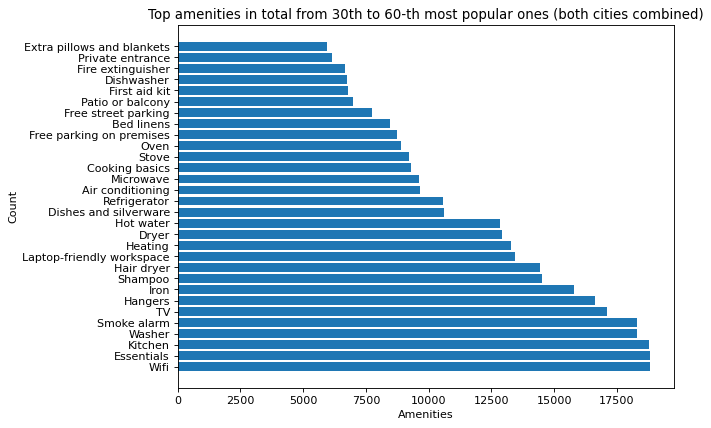

In [177]:
x = list(top_k_items.keys())
y = list(top_k_items.values())

figure(figsize=(8, 6), dpi=80)

plt.barh(x,y)
plt.title('Top amenities in total from 30th to 60-th most popular ones (both cities combined)')
plt.ylabel('Count')
plt.xlabel('Amenities')
plt.show()

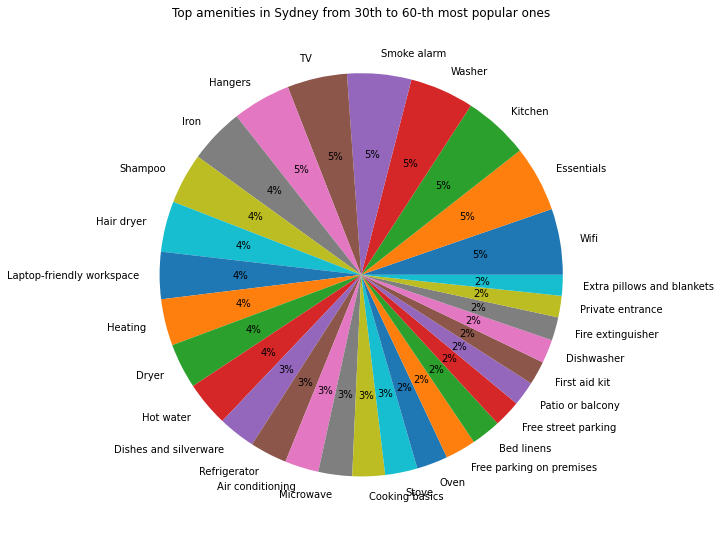

In [178]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
x = list(top_k_items.keys())
y = list(top_k_items.values())
ax.pie(y, labels = x,autopct='%1.0f%%')
fig = plt.gcf()
fig.set_size_inches(7,7) 
plt.title('Top amenities in Sydney from 30th to 60-th most popular ones')
plt.show()